In [1]:
import os
import random
import time
import math
import numpy as np
import pickle
import re
import torch
import torch.utils.data
from utils import patching,depatching,ssim, psnr, nrmse
from matplotlib import pyplot as plt
import nibabel as nib
from model import Generator

# Set pathes
id_csv = './csv/id_hcp.csv'
model_path = 'epoches/trained_G_step250000'
data_path = '/data2/lijiayang/MRI/HCP/100206_3T_Structural_unproc_3T_T1w_MPR1.nii'

# Batch size. It controls the number of samples once download
batch_size = 16
# Patch size, it controls the number of patches once send into the model
patch_size = 2
# The size of one image patch (eg. 64 means a cubic patch with size: 64x64x64)
cube_size = 64
# Set the usage of a patch cluster.
usage = 1.0
# Number of GPUs available. Use 0 for CPU mode.
ngpu = 4

# set GPU device
os.environ['CUDA_VISIBLE_DEVICES']='0,1,2,3'
device = torch.device("cuda:1" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

netG = Generator(ngpu).cuda(device)
since = time.time()
netG.load_state_dict(torch.load(model_path))
netG.eval()
nii = nib.load(data_path)
image = np.array(nii.dataobj)
image = torch.ShortTensor(image)
image = image.unsqueeze(0)
print(image.shape)
patch_loader=patching(image, image,
               patch_size = patch_size,
               cube_size = cube_size,
               usage=1.0, is_training=False)
sr_data_cat = torch.Tensor([])
i = 1
for lr_patches, hr_patches in patch_loader:
    hr_patches=hr_patches.cuda(device)
    with torch.no_grad():
        sr_patches = netG(hr_patches)
        sr_data_cat = torch.cat([sr_data_cat, sr_patches.to("cpu")],0)
        print("%d/%d" % (i,90))
        i+=1
# calculate the evaluation metric
sr_data = depatching(sr_data_cat, image.size(0)).squeeze(0).cpu().numpy()
image = image.squeeze(0).cpu().numpy()

torch.Size([1, 256, 320, 320])
1/90
2/90
3/90
4/90
5/90
6/90
7/90
8/90
9/90
10/90
11/90
12/90
13/90
14/90
15/90
16/90
17/90
18/90
19/90
20/90
21/90
22/90
23/90
24/90
25/90
26/90
27/90
28/90
29/90
30/90
31/90
32/90
33/90
34/90
35/90
36/90
37/90
38/90
39/90
40/90
41/90
42/90
43/90
44/90
45/90
46/90
47/90
48/90
49/90
50/90
51/90
52/90
53/90
54/90
55/90
56/90
57/90
58/90
59/90
60/90
61/90
62/90
63/90
64/90
65/90
66/90
67/90
68/90
69/90
70/90
71/90
72/90
73/90
74/90
75/90
76/90
77/90
78/90
79/90
80/90
81/90
82/90
83/90
84/90
85/90
86/90
87/90
88/90
89/90
90/90


(256, 320, 320)


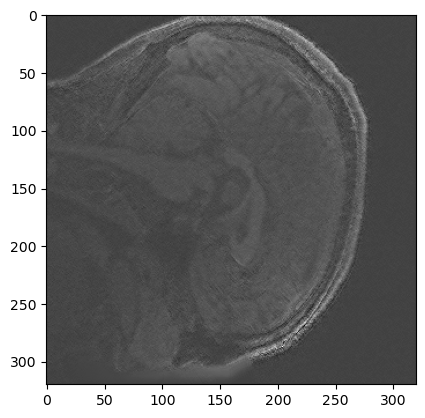

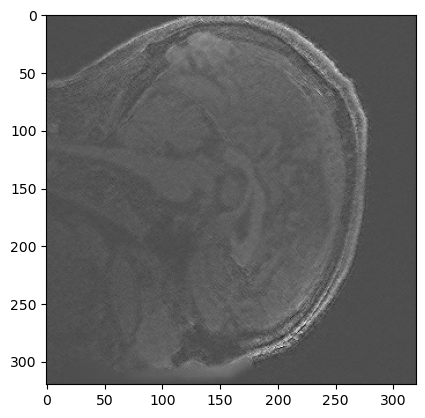

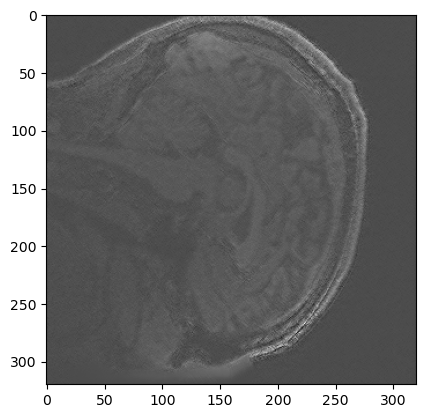

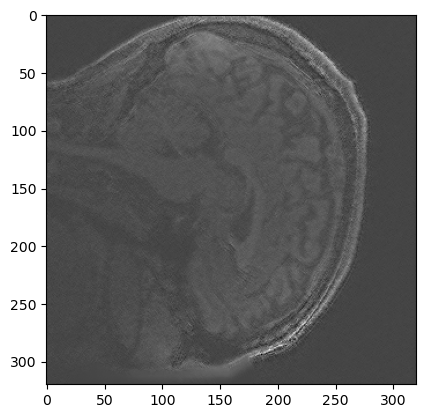

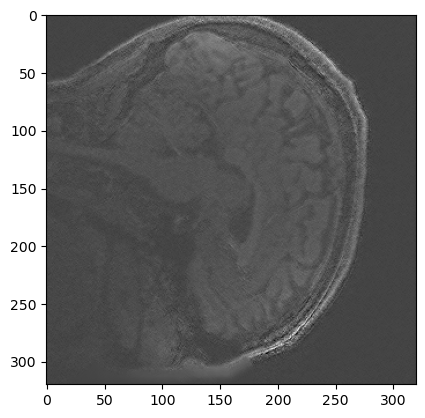

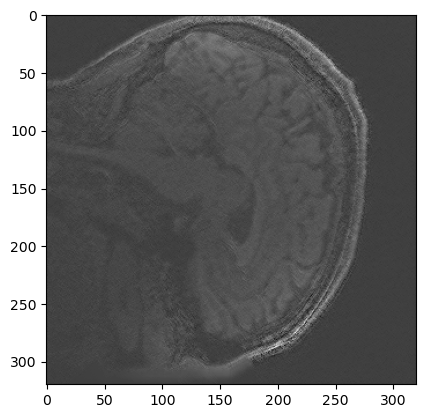

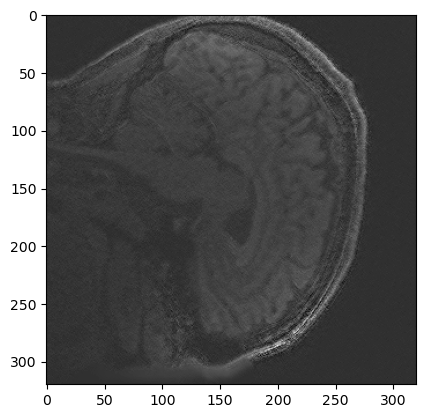

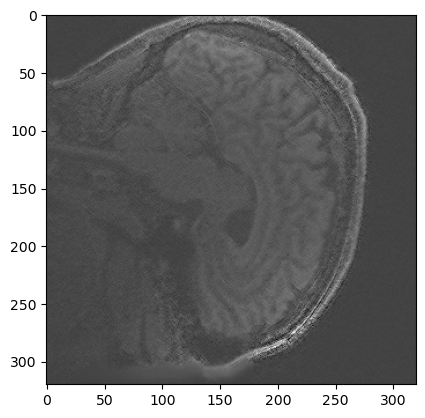

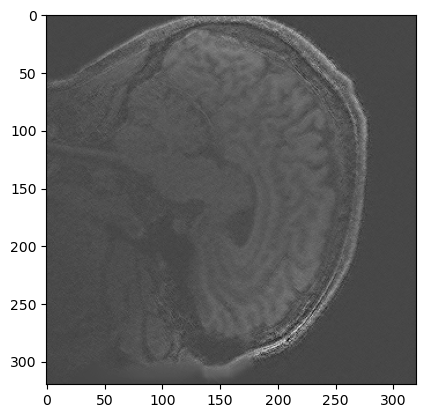

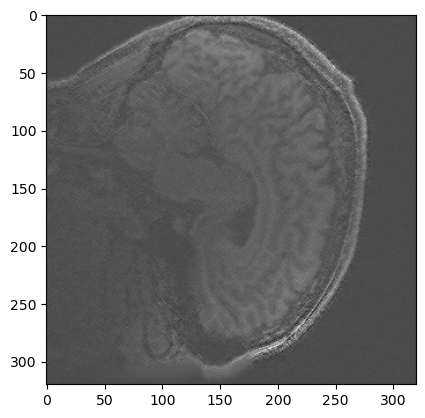

In [2]:
print(sr_data.shape)
for i in range(10):
    plt.imshow(image[128+i,:,:],cmap='gray')
    plt.imshow(sr_data[128+i,:,:],cmap='gray')
    plt.show()